## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [5]:
# importar librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv') #completa el código

In [7]:
traffic.head(5)# mostrar las primeras 5 filas de traffic

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [8]:
eco.head(5)# mostrar las primeras 5 filas de eco

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [9]:
# Examinar la estructura de traffic
traffic.info()
traffic.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo ...
- ... date (formato de fecha y hora).

In [10]:
# Examinar la estructura de eco
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ...
- ... tienen formato de object (texto), int (números enteros) y float64 (números con décimales) respectivamente.

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [12]:
# Estandarizar los nombres de las columnas de traffic
#tu código aquí
traffic.columns =  [
    'country', 'city', 'update_time_utc', 'jams_delay', 
    'traffic_index_live', 'jams_length_in_kms', 'jams_count', 
    'traffic_index_week_ago', 'update_time_utc_week_ago', 
    'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins', 
    'mins_delay'
]



# verificar cambios
traffic.columns



Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay'],
      dtype='object')

In [13]:
# Este código lo usé para verificar cuáles son las 12 columnas originales.

print(f"Número de columnas: {len(traffic.columns)}")
print("Columnas actuales:")
for i, col in enumerate(traffic.columns, 1):
    print(f"{i}. {col}")

Número de columnas: 12
Columnas actuales:
1. country
2. city
3. update_time_utc
4. jams_delay
5. traffic_index_live
6. jams_length_in_kms
7. jams_count
8. traffic_index_week_ago
9. update_time_utc_week_ago
10. travel_time_live_per_10kms_mins
11. travel_time_hist_per_10kms_mins
12. mins_delay


In [15]:
# Estandarizar los nombres de las columnas de eco
eco.columns = ['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25_μg_m3', 'population_m']#tu código aquí

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25_μg_m3', 'population_m'],
      dtype='object')

In [49]:
# Estandarizar nombres de columnas
eco_2024.columns = eco_2024.columns.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('%', 'pct').str.replace('(', '').str.replace(')', '').str.replace('μg_m³', '').str.replace('.', '').str.replace('m', '')


In [50]:
# Este código lo usé para verificar cuáles son las 7 originales columnas.
print(f"Número de columnas en eco: {len(eco.columns)}")
print("Columnas actuales:")
for i, col in enumerate(eco.columns, 1):
    print(f"{i}. {col}")

Número de columnas en eco: 8
Columnas actuales:
1. year
2. city
3. country
4. city_gdp_capita
5. unemployment_pct
6. pm25_μg_m3
7. population_m
8. population



### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [51]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors="coerce")#tu código aquí
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'], errors="coerce") #tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_in_kms               1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   traffic_index_week_ago           1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

In [52]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)# eco['city_gdp_capita'] = ....astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)# eco['unemployment_pct'] = ...
eco['population_m'] = eco['population_m'].astype(str).str.replace(',', '.').astype(float)# eco['population_m'] = ...

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m']* 1000000# eco['population'] = ...

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm25_μg_m3        30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm25_μg_m3,population_m,population
0,2023,buenos-aires,Argentina,157820.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,144750.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,131420.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [53]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [54]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year'] == 2024].copy() # traffic_2024 = traffic[...].copy()
eco_2024 = eco.copy()  # eco_2024 = ...

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm25_μg_m3,population_m,population
0,2023,buenos-aires,Argentina,157820.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,144750.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,131420.0,9.8,"19,10",13.6,13600000.0
3,2023,brasilia,Brazil,159990.0,8.3,"13,50",4.7,4700000.0
4,2023,salvador,Brazil,87610.0,13.1,"16,00",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [55]:


# Calcular los  promedios de tráfico por ciudad, país y año
traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'year'])[[
    'jams_delay', 
    'traffic_index_live', 
    'jams_length_in_kms', # Nombre corregido según estandarización previa
    'jams_count', 
    'mins_delay',
    'travel_time_live_per_10kms_mins', 
    'travel_time_hist_per_10kms_mins'
]].mean()
# Mostrar resultado
traffic_city_year_2024.head()



,,,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
city,country,year,,,,,,,
a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


In [42]:
#¿Qué columnas tengo realmente en DataFrame traffic_2024?
print("Columnas disponibles en traffic_2024:")
print(traffic_2024.columns.tolist())

Columnas disponibles en traffic_2024:
['country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'traffic_index_week_ago', 'update_time_utc_week_ago', 'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins', 'mins_delay', 'year']


In [43]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,,,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
city,country,year,,,,,,,
mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...
dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [24]:
# tu código aquí
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,,,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
city,country,year,,,,,,,
mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...
dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639


La ciudad con el mayor tiempo promedio de tráfico es ...


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [56]:

# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25_μg_m3', 'population_m']
# Usar .copy() para crear los dos nuevos datasets reducidos
# traffic_2024_small = traffic_city_year_2024[ ... ].copy()
traffic_2024_small = traffic_city_year_2024_reset[left_cols].copy()
# eco_2024_small = ...
eco_2024_small = eco_2024[right_cols].copy()
# Unir datasets
merged = pd.merge(                            # tu código aquí
    left=traffic_2024_small, 
    right=eco_2024_small, 
    on=['city', 'year'], 
    how='inner'
) 
# Mostrar las primeras 5 filas
print(merged.head(5))# tu código aquí


             city country_x  year   jams_delay  traffic_index_live  \
0  belo-horizonte       BRA  2024   263.047879           19.428946   
1          bogota       COL  2024  1141.552364           37.614273   
2        brasilia       BRA  2024   101.576326           11.258220   
3    buenos-aires       ARG  2024   571.089593           17.756012   
4        curitiba       BRA  2024   183.469274           14.954545   

   jams_length_in_kms  jams_count  mins_delay  \
0           44.038129   68.805422    0.487228   
1          140.893564  230.566550    1.699628   
2           18.337133   27.280140    0.193442   
3          100.287844  137.359860    0.416566   
4           30.050044   46.898164    0.139965   

   travel_time_live_per_10kms_mins  travel_time_hist_per_10kms_mins  \
0                        18.304538                        17.817311   
1                        24.992185                        23.292557   
2                        13.338658                        13.145216   


In [45]:
#¿Qué contiene la variable right_cols?
print(right_cols)

['city', 'year', 'city_gdp_capita', 'unemployment_pct', 'pm25', 'population']


In [46]:
#¿Cuáles son las columnas reales de tu DataFrame eco_2024?
print(eco_2024.columns.tolist())


['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct', 'pm25_μg_m3', 'population_m', 'population']


In [26]:
#Verifica la estructura de tu DataFrame:
print("Columnas disponibles:")
print(traffic_city_year_2024.columns.tolist())
print("\nÍndices:")
print(traffic_city_year_2024.index.names)
print("\nForma del DataFrame:")
print(traffic_city_year_2024.shape)

Columnas disponibles:
['jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'mins_delay', 'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins']

Índices:
['city', 'country', 'year']

Forma del DataFrame:
(387, 7)


In [27]:
# Si las columnas están en el índice, necesitas resetear el índice:
# Resetear el índice para convertir los índices en columnas
traffic_city_year_2024_reset = traffic_city_year_2024.reset_index()
print("Columnas después de reset_index:")
print(traffic_city_year_2024_reset.columns.tolist())


Columnas después de reset_index:
['city', 'country', 'year', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'mins_delay', 'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins']


In [28]:
# Resetear el índice para tener todas las columnas disponibles
traffic_city_year_2024_reset = traffic_city_year_2024.reset_index()

# Verificar que ahora tienes todas las columnas
print("Columnas después de reset_index:")
print(traffic_city_year_2024_reset.columns.tolist())

Columnas después de reset_index:
['city', 'country', 'year', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'mins_delay', 'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins']



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

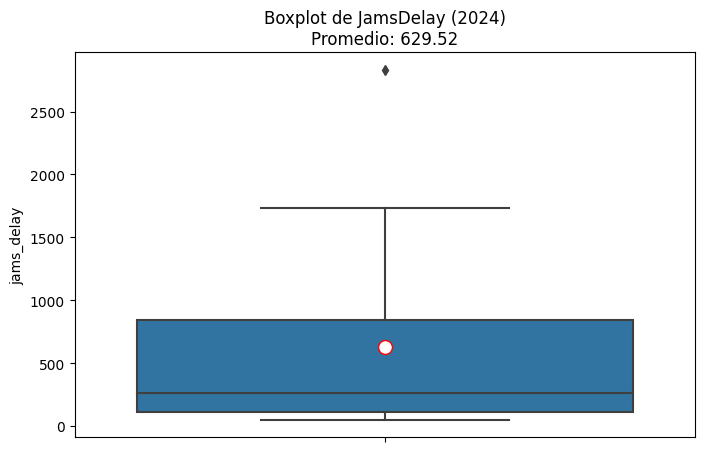

In [58]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()

# Crear el boxplot con la media visible (showmeans=True)
plt.figure(figsize=(8, 5)) # Opcional: ajustar tamaño del gráfico
sns.boxplot(y='jams_delay', data=merged, showmeans=True, meanprops={
    "marker": "o",
    "markerfacecolor": "white",
    "markeredgecolor": "red",
    "markersize": "10",
}) 

plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


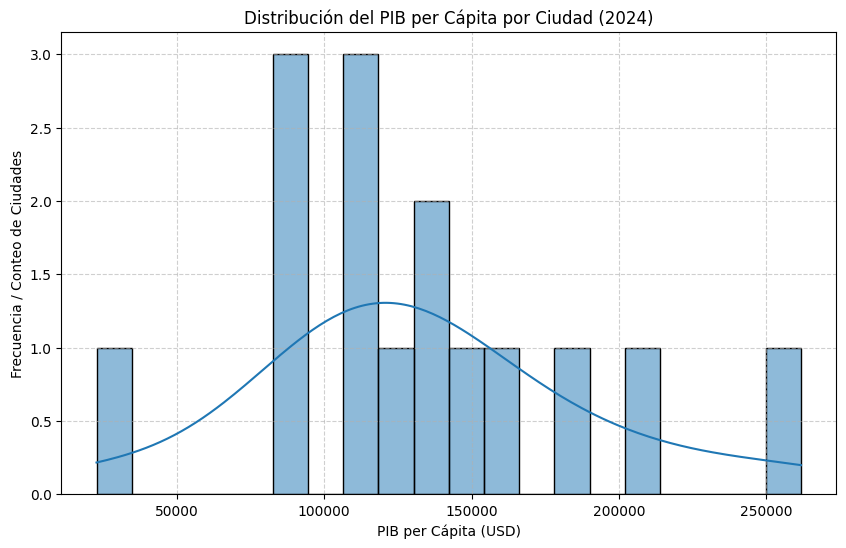

In [59]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico

# Crea el histograma. 'bins' controla el número de barras.
sns.histplot(data=merged, x='city_gdp_capita', bins=20, kde=True) 

plt.title('Distribución del PIB per Cápita por Ciudad (2024)')
plt.xlabel('PIB per Cápita (USD)') 
plt.ylabel('Frecuencia / Conteo de Ciudades') 

plt.grid(True, linestyle='--', alpha=0.6) # Opcional: añade una rejilla suave
plt.show()

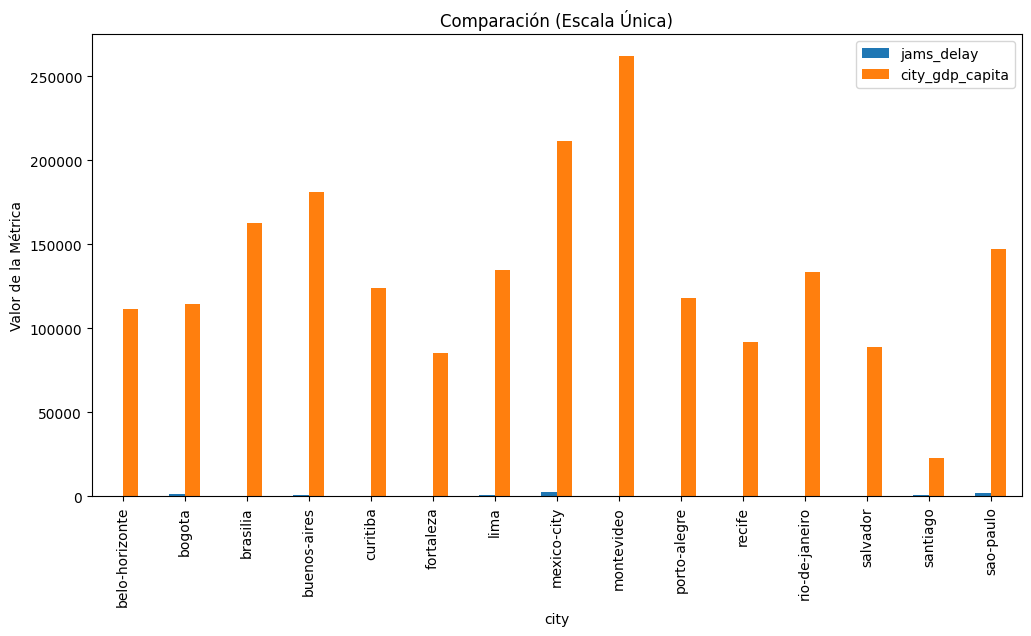

In [60]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])

#las barras de delay apenas se verán
merged.plot(
    kind='bar', 
    x='city', 
    y=['jams_delay', 'city_gdp_capita'], 
    title='Comparación (Escala Única)',
    figsize=(12, 6)
)
plt.ylabel('Valor de la Métrica')

# Código agregado para rotar etiquetas del eje X
plt.xticks(rotation=90)
plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

*
 ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?


Escribe tus comentarios:las ciudades con mayor actividad económica (mayor PIB per cápita) suelen atraer a más población y empresas, lo que incrementa el número de vehículos en circulación. Por lo cual, incremnta la densidad de infraestructuras y empleos.


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [63]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?
